In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
import tensorflow as tf
from tensorflow import keras


In [38]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, trainy), (x_test, testy) = fashion_mnist.load_data()

In [39]:
trainX = np.expand_dims(x_train, -1)
testX = np.expand_dims(x_test, -1)

In [40]:
x_test.shape

(10000, 28, 28)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D, Flatten
from tensorflow.keras.optimizers import Adam

In [42]:
def model_arch():
	models = Sequential()
	
	# We are learning 64 
	# filters with a kernel size of 5x5
	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu", 
					input_shape=(28, 28, 1)))
	
	# Max pooling will reduce the
	# size with a kernel size of 2x2
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same", 
					activation="relu"))
	
	models.add(MaxPooling2D(pool_size=(2, 2)))
	
	# Once the convolutional and pooling 
	# operations are done the layer
	# is flattened and fully connected layers
	# are added
	models.add(Flatten())
	models.add(Dense(256, activation="relu"))
	
	# Finally as there are total 10
	# classes to be added a FCC layer of
	# 10 is created with a softmax activation
	# function
	models.add(Dense(10, activation="softmax"))
	return models


In [43]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 256)       

In [44]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 132s 1s/step - loss: 2.7992 - sparse_categorical_accuracy: 0.6925 - val_loss: 0.4053 - val_sparse_categorical_accuracy: 0.8538
Epoch 2/10
100/100 [==============================] - 135s 1s/step - loss: 0.3756 - sparse_categorical_accuracy: 0.8642 - val_loss: 0.3271 - val_sparse_categorical_accuracy: 0.8834
Epoch 3/10
100/100 [==============================] - 138s 1s/step - loss: 0.3100 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.3328 - val_sparse_categorical_accuracy: 0.8801
Epoch 4/10
100/100 [==============================] - 133s 1s/step - loss: 0.2742 - sparse_categorical_accuracy: 0.8997 - val_loss: 0.2863 - val_sparse_categorical_accuracy: 0.8960
Epoch 5/10
100/100 [==============================] - 131s 1s/step - loss: 0.2454 - sparse_categorical_accuracy: 0.9105 - val_loss: 0.2772 - val_sparse_categorical_accuracy: 0.8998
Epoch 6/10
100/100 [==============================] - 132s 1s/step - loss: 0.2211 - sparse_cate

In [53]:
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 8s 24ms/step


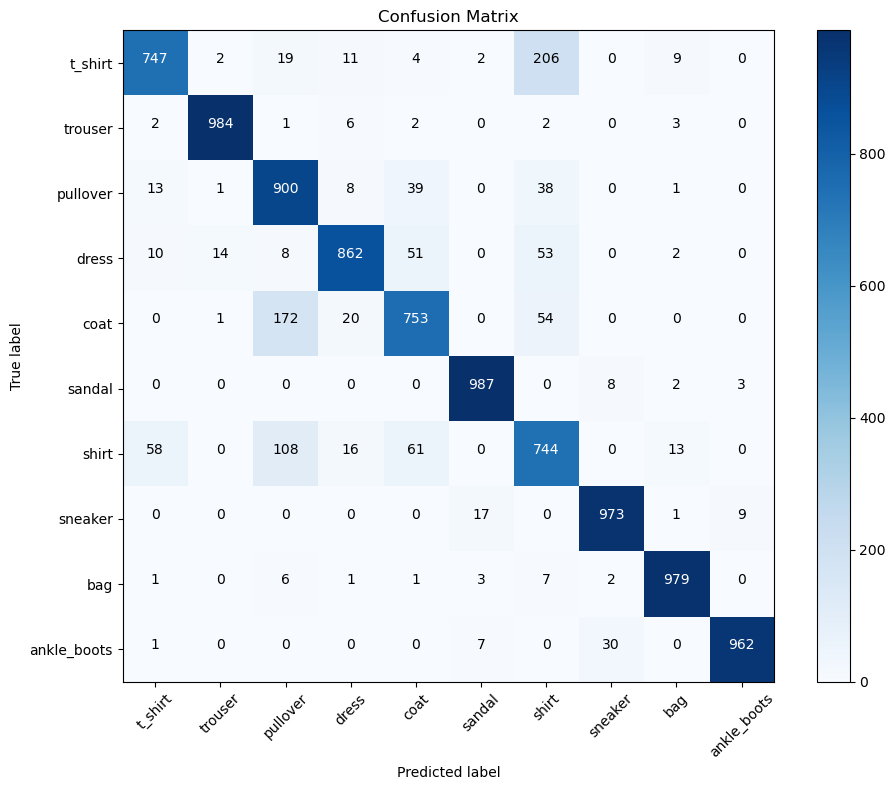

In [56]:
import matplotlib.pyplot as plt

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Add text annotations
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
    
    plt.tight_layout()

# Assuming class names are in `class_names`
class_names = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

plot_confusion_matrix(cm, classes=class_names)
plt.show()

1/1 [==============================] - 0s 46ms/step
ankle_boots


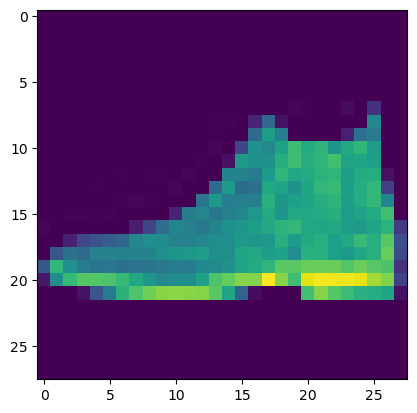

In [55]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]
 
print(label)
plt.imshow(testX[:1][0])
plt.show()
